# Exercise 4.1

## Question:
In Example 4.1, if $\pi$ is the equiprobable random policy, what is $q_{\pi}(11,down)$?
What is $q_{\pi}(7,down)$?
## Answer:
\begin{equation*}
q_{\pi}(s,a) = \sum_{s',r} p(s',r|s,a) [r + \gamma v_{\pi}(s')]
\end{equation*}
Therefore,
\begin{equation*}
q_{\pi}(11,down) = 1 \cdot (-1 + 1 \cdot 0) = 0 \\
q_{\pi}(7,down) = 1 \cdot (-1 + 1 \cdot (-14)) = -14
\end{equation*}

# Exercise 4.2

## Question:
In Example 4.1, suppose a new state $15$ was added to the gridworld just below state $13$, and its actions, $left$, $up$, $right$ and $down$, take the agent to states $12$, $13$, $14$ and $15$, respectively. Assume that the transitions ___from___ the original states are unchanged. What, then, is $v_{\pi}(15)$ for the equiprobable random policy? Now suppose the dynamics of state $13$ are also changed, such that action $down$ from state $13$ takes the agent to the new state $15$. What is $v_{\pi}(15)$ for the equiprobable random policy in this case?

## Answer:
With still unchanged transitions ___from___ the original states, there is no way to get to state $15$ unless already in it (because $p(13|13,down) = 1$ and $p(15|13,down) = 0$). Therefore, no other state's value is dependent upon state $15$ than state $15$ itself.

The general equation for state value is, in this example:
\begin{equation*}
v_{\pi}(s) = \sum_{a} \pi(a|s) \sum_{s',r} p(s',r|s,a) [r + \gamma v_{\pi}(s')]
\\ = \frac{1}{4} \sum_{a}[v_{\pi}(s') - 1]
\end{equation*}

Seven state value update iterations using the below equation are sufficient for $v(15)$ to clearly approximate -20:
\begin{equation*}
v_{\pi}(15) = \frac{1}{4} \big( v_{\pi}(12) - 1 + [v_{\pi}(13) - 1 + [v_{\pi}(14) - 1 + [v_{\pi}(15) - 1 \big) \\
v_{1}(15) = -15 \\
v_{2}(15) = -18.75 \\
v_{3}(15) = -19.6875 \\
v_{4}(15) = -19.921875 \\
v_{5}(15) = -19.98046875 \\
v_{6}(15) = -19.9961171875 \\
v_{7}(15) = -19.998779296875 \approx -20 \\
\end{equation*}

With the change in dynamics of state $13$, there is now a path to state $15$ - from state $13$. The value of state $13$ (and, subsequently, of all of its possible predecessor states) would need to be updated to reflect the new dynamics. To update the value state from $v_{\pi, old}(13)$ to $v_{\pi, new}(13)$, one would only need to substitute $v_{\pi}(13)$ by $v_{\pi}(15)$ to reflect the action $down$ - the rest of the calculation remains the same. However, the problem states $v_{*}(13)= -20$ and we already arrived at $v_{*}(15) = -20$. Hence, the value of state $13$ will remain effectively unchanged, and so will its possible predecessor states' values. 

# Exercise 4.3

## Question:
What are the equations analogous to (4.3), (4.4), and (4.5) for the actoin-value function $q_{\pi}$ and its successive approximation by a sequence of functions $q_0$, $q_1$, $q_2$, ...? 

## Answer:
\begin{equation*}
q_{\pi}(s,a) = \mathbb{E}[G_t | S_t=s, A_t = a] 
\\ =  \mathbb{E}[R_{t+1} + \gamma G_{t+1} | S_t=s, A_t = a] 
\\ =  \mathbb{E}[R_{t+1} + \gamma q_{\pi}(S_{t+1}, A_{t+1}) | S_t=s, A_t = a] 
\\ = \sum_{s',r} p(s',r|s,a) \big[ r + \gamma \sum_{a'} \pi(a'|s') q_{\pi}(s',a') \big] \\
q_{k+1}(s,a) = \mathbb{E}[R_{t+1} + \gamma q_{k}(S_{t+1}, A_{t+1}) | S_t=s, A_t = a] 
\\ = \sum_{s',r} p(s',r|s,a) \big[ r + \gamma \sum_{a'} \pi(a'|s') q_{k}(s',a') \big] \\
\end{equation*}

# Exercise 4.4

## Question:
The policy iteration algorithm on page 80 has a subtle bug in that it may never terminate if the policy continually switches between two or more policies that are equally good. This is ok for pedagogy, but not for actual use. Modify the pseudocode so convergence is guaranteed.

## Answer:
The corrected algorithm is:
1. Initialization

   <div>$V(s) \in \mathbb{R}$ and $\pi(s) \in A(s)$ arbitrarily for all $s \in S$</div>
   <div>&nbsp;</div>
   
2. Policy Evaluation

   <div>Loop:</div> 
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow 0$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>Loop for each $s \in S:$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$v \leftarrow V(s)$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$V(s) \leftarrow \sum_{s',r} p(s',r|s,\pi(s))[r + \gamma V(s')]$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow max(\Delta, |v - V(s)|)$</div>
   <div>until $\Delta < \Theta$ (a small positive number determining the accuracy of estimation)</div> 
   <div>&nbsp;</div>
   
3. Policy Improvement

   <div>$policy$-$stable \leftarrow true$</div>
   <div>For each $s \in S$:</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow 0$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$old$-$action \leftarrow \pi(s)$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$old$-$value \leftarrow V(s)$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\pi(s) \leftarrow argmax_{a} \sum_{s',r} p(s',r|s,a)[r + \gamma V(s')]$</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;</i>$new$-$value \leftarrow \sum_{s',r} p(s',r|s,\pi(s))[r + \gamma V(s')]$</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow \max(\Delta, |old$-$value - new$-$value|)$ across all actions</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;</i>If $old$-$action \neq \pi(s)$ and $\Delta > \Theta$, then $policy$-$stable \leftarrow false$</div>
   <div>If $policy$-$stable$, then stop and return $V \approx v_*$ and $\pi \approx \pi_*$; else go to 2</div>
   

# Exercise 4.5

## Question:
How would policy iteration be defined for action values? Give a complete algorithm for computing $q_*$, analogous to that on page 80 for computing $v_*$. Please pay special attention to this exercise, because the ideas involved will be used throughout the rest of this book.

## Answer:
The algorithm for finding optimal action-values is:

1. Initialization

   <div>$Q(s,a) \in \mathbb{R}$ and $\pi(s) \in A(s)$ arbitrarily for all $s \in S$, $a \in A(s)$</div>
   <div>&nbsp;</div>
   
2. Policy Evaluation

   <div>Loop:</div> 
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow 0$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>Loop for each $s \in S$, $a \in A(s)$:</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$q \leftarrow Q(s,a)$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$Q(s,a) \leftarrow \sum_{s',r} p(s',r|s,a)[r + \gamma Q(s',\pi(s))]$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow max(\Delta, |q - Q(s,a)|)$</div>
   <div>until $\Delta < \Theta$ (a small positive number determining the accuracy of estimation)</div> 
   <div>&nbsp;</div>
   
3. Policy Improvement

   <div>$policy$-$stable \leftarrow true$</div>
   <div>For each $s \in S$:</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow 0$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$old$-$action \leftarrow \pi(s)$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$old$-$value \leftarrow V(s)$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\pi(s) \leftarrow argmax_{a} Q(s,a)$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$new$-$value \leftarrow \sum_{s',r} p(s',r|s,a)[r + \gamma Q(s',\pi(s))]$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow \max(\Delta, |old$-$value - new$-$value|)$ across all actions</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>If $old$-$action \neq \pi(s)$ and $\Delta > \Theta$, then $policy$-$stable \leftarrow false$</div>
   <div>If $policy$-$stable$, then stop and return $Q \approx q_*$ and $\pi \approx \pi_*$; else go to 2</div>


# Exercise 4.6

## Question:

Suppose you are restricted to considering only policies that are $\epsilon$___-soft___, meaning that the probability of selecting each item in each state, $s$, is at least $\frac{\epsilon}{|A(s)|}$. Describe qualitatively the changes that would be required in each of the steps $3$, $2$, and $1$, in that order, of the policy iteration algorithm for $v_*$ on page 80.
## Answer:
The necessary changes to the algorithm are:
1. Initialization

   <div style="background-color:#777777">$V(s) \in \mathbb{R}$ arbitrarily for all $s \in S$</div>
   <div style="background-color:#777777"><i></i>For each $a in A(s)$:</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;</i>$\pi(a|s)$</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$\leftarrow 1 - \epsilon + \frac{\epsilon}{|A(s)|}$ for $a_* = 0$, or</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$\leftarrow \frac{\epsilon}{|A(s)|}$ for all $a \neq a_*$, for every state $s$, where $|A(s)|$ signifies the number of valid actions for $s$.</div>
   <div>&nbsp;</div>
   
2. Policy Evaluation

   <div>Loop:</div> 
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow 0$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>Loop for each $s \in S:$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$v \leftarrow V(s)$</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$V(s) \leftarrow \sum_{a} \pi(a|s) \sum_{s',r} p(s',r|s, a)[r + \gamma V(s')]$</div>
   <div><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow max(\Delta, |v - V(s)|)$</div>
   <div>until $\Delta < \Theta$ (a small positive number determining the accuracy of estimation)</div> 
   <div>&nbsp;</div>
   
3. Policy Improvement

   <div>$policy$-$stable \leftarrow true$</div>
   <div>For each $s \in S$:</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow 0$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$old$-$action \leftarrow \arg\max_{a} \pi(a|s)$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$old$-$value \leftarrow V(s)$</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;</i>For each $a in A(s)$:</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$\pi(a|s)$</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$\leftarrow 1 - \epsilon + \frac{\epsilon}{|A(s)|}$ for $a_* = argmax_{a} \sum_{s',r} p(s',r|s,a) [r + \gamma V(s')]$, or</div>
   <div style="background-color:#777777"><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</i>$\leftarrow \frac{\epsilon}{|A(s)|}$ for all $a \neq a_*$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$new$-$value \leftarrow \sum_{a} \pi(a|s) \sum_{s',r} p(s',r|s, a)[r + \gamma V(s')]$</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>$\Delta \leftarrow \max(\Delta, |old$-$value - new$-$value|)$ across all actions</div>
   <div><i>&nbsp;&nbsp;&nbsp;</i>If $old$-$action \neq \pi(s)$ and $\Delta > \Theta$, then $policy$-$stable \leftarrow false$</div>
   <div>If $policy$-$stable$, then stop and return $V \approx v_*$ and $\pi \approx \pi_*$; else go to 2</div>

# Exercise 4.7 (programming)

## Question:
Write a program for policy iteration and re-solve <b>Jack's car rental problem</b> with the following changes. One of Jack's employees at the first location rides a bus home each night and lives near the second location. She is happy to shuttle one car to the second location for free. Each additional car still costs \\$2, as do all cars moved in the other direction. In addition, Jack has limited parking space at each location. If more than 10 cars are kept overnight at a location (after any moving of cars), than an additional cost of \\$4 must be incurred to use a second parking lot (independent of how many cars are kept there). These sorts of non-linearities and arbitrary dynamics often occur in real problems and cannot easily be handled by optimization methods other than dynamic programming. To check your program, first replicate the results given for the original problem. 

## Answer:
### Discussion and Assumptions:
1. The problem statement does not explicitly mention the use of an <b>$\epsilon$-soft policy</b>. The below code assumes it and sets the value of $\epsilon$ in <b>CarRental/constants.py</b>. Furthermore, our understanding of an $\epsilon$-soft policy is:
 - during <b>Initialization</b> and <b>Policy Improvement</b>, we compute the policy function $\pi(a|s)$, assigning probability $\pi(a_*|s) = 1 - \epsilon + \frac{\epsilon}{|A(s)|}$ for the value-maximizing action $a_*$ of state $s$ and probability $\pi(a_{other}|s) = \frac{\epsilon}{|A(s)|}$ for every other action $a_{other}$ available for state $s$;
 - during <b>Policy Evaluation</b>, we compute the value function $v(s)$ by using an <b>$\epsilon$-greedy policy</b>, which ensures $\epsilon$ probability that any valid action will be selected for each state. This measure of exploration should provide theoretical guarantees for convergence.


2. The Problem statement doesn't mention the value, $\theta$, of the threshold for further refreshes of the value function. The below code sets the value of $\theta$ in <b>CarRental/constants.py</b>.


3. Because the number of rentals/returns at any location is limited to a maximum of 20 cars, the Poisson probabilities of having any number of rentals or returns at any location in a business day don't add up to 1. The below code addresses this by padding the probability of the highest possible number of rentals/returns in any given situation. This way, we theoretically:
 - handle 12 returns at a location with leftover capacity of 3 returns as part of the probability of having only 3 returns that day;
 - handle 12 rentals at a location with only 3 available cars as part of the probability of having rented only 3 cars that day (with no rewards for the extra rental requests that couldn't be fulfilled).
 
 
4. We further assume that, per the extended problem statement (Exercise 4.7), a maximum of 5 cars can be moved overnight from location A to location B (1 shuttled by an employee at no cost and up to 4 for \\$2 a piece). In the original problem (as stated in Example 4.2), every moved car would incur cost. 


5. The code is based on the concept of a <b>pseudo-state</b>, which can be intuitively described as the number of cars across locations at 6am: following transfer of cars but prior to the start of the business day. When in this pseudo-state, which state is reached next depends on Poisson random variables.

### Instructions for running the code:
The code is based on pandas/numpy, and was written with learning/demonstration in mind (as opposed to good practices/performance). 

A few constants can be set below (and have internal pre-sets). The logic itself is stored in the modules chapter_4/CarRental/* and chapter_4/car_rental.py; all constants are in chapter_4/CarRental/constants.py. At the very least, the working directory must be set correctly for the code to run. 

The code can be executed both in IPython (notebook chapter_4/Chapter 4 Exercises.ipynb) and directly (by running the module chapter_4/car_rental.py).

Library versions used: python 3.7.3, numpy 1.15.4, matplotlib 3.1.0, pandas 0.24.2.  

Reproducing the original Jack's Car Rental Problem (Example 4.2 + Figure 4.2):

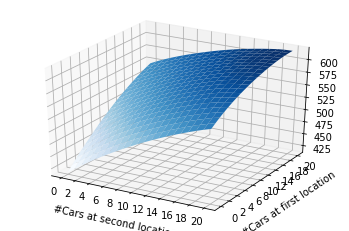

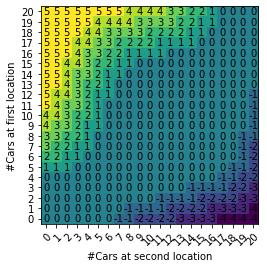

In [3]:
%matplotlib inline
import car_rental
import CarRental.constants

# Optionally, set values of constants for the original problem:

# whether we're solving the original problem (Example 4.2) 
# or for the additional requirements (Ex. 4.7);
CarRental.constants.IS_ORIGINAL_PROBLEM = True

# whether to use disk to r/w the following CSV files:
# (-) states, valid next actions and their respective pseudo-
#     states, and the car transfer fees they incur (dfSASP.csv);
# (-) pseudo-states, valid rental/return combinations for them,
#     the next state they lead to, as well as the respective
#     probabilities, rewards and overflow parking fees they
#     incur (dfSp_Ren_Ret.csv);
# (-) states and their respective values, as learned in
#     policy iteration (dfV.csv);
# (-) states and actions, plus their respective probabilities
#     per policy, as learned in policy iteration (dfPi.csv).
# Don't use this option if you don't have >=rw access to disk;
CarRental.constants.USE_DISK_FOR_CSV_DATA = True

# what directory to use for r/w of CSV files from/to disk
CarRental.constants.PATH_SPRENRET_CSV = "C:/Temp/rlai-exercises/Chapter 4/data"

# whether to load cached preprocessed data from CSV files
# for purposes of quick visualization w/o a full code run
# (dfSASP.csv, dfSp_Ren_Ret.csv).
# Don't set this to TRUE if USE_DISK_FOR_CSV_DATA = False;
CarRental.constants.GET_DATA_FROM_CSV = True

# whether to load cached models from CSV files
# for purposes of quick visualization w/o a full code run
# (dfPi.csv, dfV.csv).
# Don't set this to TRUE if USE_DISK_FOR_CSV_DATA = False;
CarRental.constants.GET_MODEL_FROM_CSV = True

# what file numbers to use for loading the models from
# dfPi.csv, dfV.csv.
# Set both to -1 if GET_MODEL_FROM_CSV = False or to
# the file numbers >=0 if GET_MODEL_FROM_CSV = True;
# don't set this to TRUE if USE_DISK_FOR_CSV_DATA = False.
CarRental.constants.PI_SEQ_NR = 5
CarRental.constants.V_SEQ_NR = 6


assert (not (
    CarRental.constants.GET_DATA_FROM_CSV == True and CarRental.constants.USE_DISK_FOR_CSV_DATA == False))
assert (not (
    CarRental.constants.GET_MODEL_FROM_CSV == True and CarRental.constants.USE_DISK_FOR_CSV_DATA == False))
assert (not (
    CarRental.constants.GET_MODEL_FROM_CSV == True and (
        CarRental.constants.PI_SEQ_NR == -1 or CarRental.constants.V_SEQ_NR == -1)))

# for more constants, see CarRental/constants.py.

# finally, run the code for visualizing the results:
car_rental.run()

Adapting the solution for the additional requirements (Exercise 4.7):

In [4]:
# Now, set constants for the problem extended beyond Example 4.2 and Fig. 4.2
# to the extra details described in Exercise 4.7 
CarRental.constants.IS_ORIGINAL_PROBLEM = False
CarRental.constants.USE_DISK_FOR_CSV_DATA = True
CarRental.constants.PATH_SPRENRET_CSV = "C:/Temp/rlai-exercises/Chapter 4/data"
CarRental.constants.GET_DATA_FROM_CSV = True
CarRental.constants.GET_MODEL_FROM_CSV = True
CarRental.constants.PI_SEQ_NR = -1
CarRental.constants.V_SEQ_NR = -1


assert (not (
    CarRental.constants.GET_DATA_FROM_CSV == True and CarRental.constants.USE_DISK_FOR_CSV_DATA == False))
assert (not (
    CarRental.constants.GET_MODEL_FROM_CSV == True and CarRental.constants.USE_DISK_FOR_CSV_DATA == False))
assert (not (
    CarRental.constants.GET_MODEL_FROM_CSV == True and (
        CarRental.constants.PI_SEQ_NR == -1 or CarRental.constants.V_SEQ_NR == -1))

# finally, run the code for visualizing the results:
car_rental.run()

SyntaxError: invalid syntax (<ipython-input-4-b528f03010fa>, line 21)

# Exercise 4.8

## Question:
Why does the optimal policy for the gambler's problem have such a curious form? In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it does not. Why is this a good policy?

## Answer:



# Exercise 4.9 (programming)

## Question:
Implement value iteration for the gambler's problem and solve it for for $p_h = 0.25$ and $p_h = 0.55$. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital 0 or 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as $\theta \rightarrow 0$?  

## Answer:

# Exercise 4.10

## Question:
What is the analog of the value iteration update (4.10) for action values, $q_{k+1}(s,a)$?

## Answer:

